In [1]:
import pandas as pd
import pyrsm as rsm

rsm.__version__ # should be 0.9.26 or higher

'0.9.26'

In [2]:
# run the code below to ensure you have the latest version
# %pip install --user pyrsm --upgrade

In [3]:
## setup pyrsm for autoreload when you edit code and save
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [4]:
# load data
diamonds = pd.read_parquet("data/diamonds.parquet")
click = pd.read_parquet("data/click.parquet")

In [5]:
# review the data descriptions
rsm.md("data/diamonds_description.md")

## Diamond prices

Prices of 3,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of a sample of 3000 diamonds. The variables are as follows:

### Variables

- price = price in US dollars ($338--$18,791)
- carat = weight of the diamond (0.2--3.00)
- clarity = a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- cut = quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color = diamond color, from J (worst) to D (best)
- depth = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (54.2--70.80)
- table = width of top of diamond relative to widest point (50--69)
- x = length in mm (3.73--9.42)
- y = width in mm (3.71--9.29)
- z = depth in mm (2.33--5.58)
- date = shipment date

### Additional information

<a href="http://www.diamondse.info/diamonds-clarity.asp" target="_blank">Diamond search engine</a>


In [6]:
# review the data descriptions
rsm.md("data/click_description.md")

## Click ballpoint pens

### Description

The data represent annual sales for 40 territories for Click, a national manufacturer of ballpoint pens. The company uses regional wholesalers to distribute their products. In addition they use company sales representatives and TV advertising.  

### Variables

A data frame with 40 observations on 4 variables

- sales =	Sales of Click products in a territory in $1000
- advertising = Number of spots purchased in a territory
- salesreps = Total number of sales representatives assigned to a territory
- wholesaler_eff = A measure of wholesaler efficiency based on a survey. A factor with four levels: Poor, Fair, Good, and Excellent

### Source

Marketing Research: Methodological Foundations by Iacobucci and Churchill, Cengage Learning

In [7]:
reg = rsm.model.regress(
    data={"diamonds": diamonds},
    rvar="price",
    evar="clarity"
)
reg.summary()
# reg.summary(main=False, fit=False)

Linear regression (OLS)
Data                 : diamonds
Response variable    : price
Explanatory variables: clarity
Null hyp.: the effect of x on price is zero
Alt. hyp.: the effect of x on price is not zero

               coefficient  std.error  t.value p.value     
Intercept         4194.775    616.530    6.804  < .001  ***
clarity[SI2]       905.414    639.415    1.416   0.157     
clarity[SI1]      -196.198    633.401   -0.310   0.757     
clarity[VS2]      -371.808    634.911   -0.586   0.558     
clarity[VS1]      -405.594    643.823   -0.630   0.529     
clarity[VVS2]     -856.955    658.518   -1.301   0.193     
clarity[VVS1]    -1586.315    669.318   -2.370   0.018    *
clarity[IF]      -1783.078    730.540   -2.441   0.015    *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.031, Adjusted R-squared: 0.029
F-statistic: 13.759 df(7, 2992), p.value < 0.001
Nr obs: 3,000


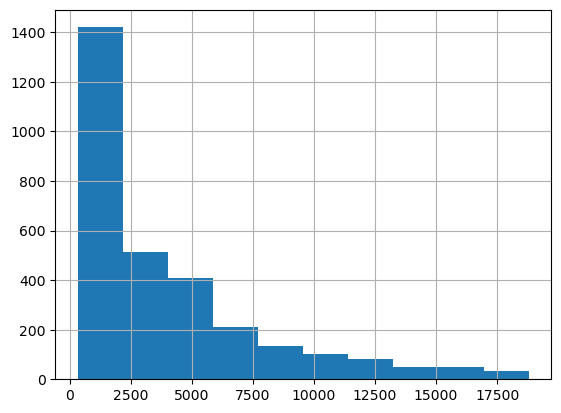

In [8]:
fig = diamonds.price.hist()

In [9]:
reg.coef.round(3)

,index,coefficient,std.error,t.value,p.value,
0,Intercept,4194.775,616.530,6.804,0.000,***
1,clarity[T.SI2],905.414,639.415,1.416,0.157,
2,clarity[T.SI1],-196.198,633.401,-0.310,0.757,
3,clarity[T.VS2],-371.808,634.911,-0.586,0.558,
4,clarity[T.VS1],-405.594,643.823,-0.630,0.529,
5,clarity[T.VVS2],-856.955,658.518,-1.301,0.193,
6,clarity[T.VVS1],-1586.315,669.318,-2.370,0.018,*
7,clarity[T.IF],-1783.078,730.540,-2.441,0.015,*


In [10]:
reg.summary(main=False, fit=True)


R-squared: 0.031, Adjusted R-squared: 0.029
F-statistic: 13.759 df(7, 2992), p.value < 0.001
Nr obs: 3,000


In [11]:
reg.summary(main=False, fit=False, ci=True)


Confidence intervals:

                 coefficient      2.5%     97.5% p.values     
Intercept           4194.775  2985.909  5403.641   < .001  ***
clarity[T.SI2]       905.414  -348.323  2159.151    0.157     
clarity[T.SI1]      -196.198 -1438.145  1045.748    0.757     
clarity[T.VS2]      -371.808 -1616.714   873.097    0.558     
clarity[T.VS1]      -405.594 -1667.975   856.787    0.529     
clarity[T.VVS2]     -856.955 -2148.149   434.239    0.193     
clarity[T.VVS1]    -1586.315 -2898.685  -273.946    0.018    *
clarity[T.IF]      -1783.078 -3215.490  -350.666    0.015    *


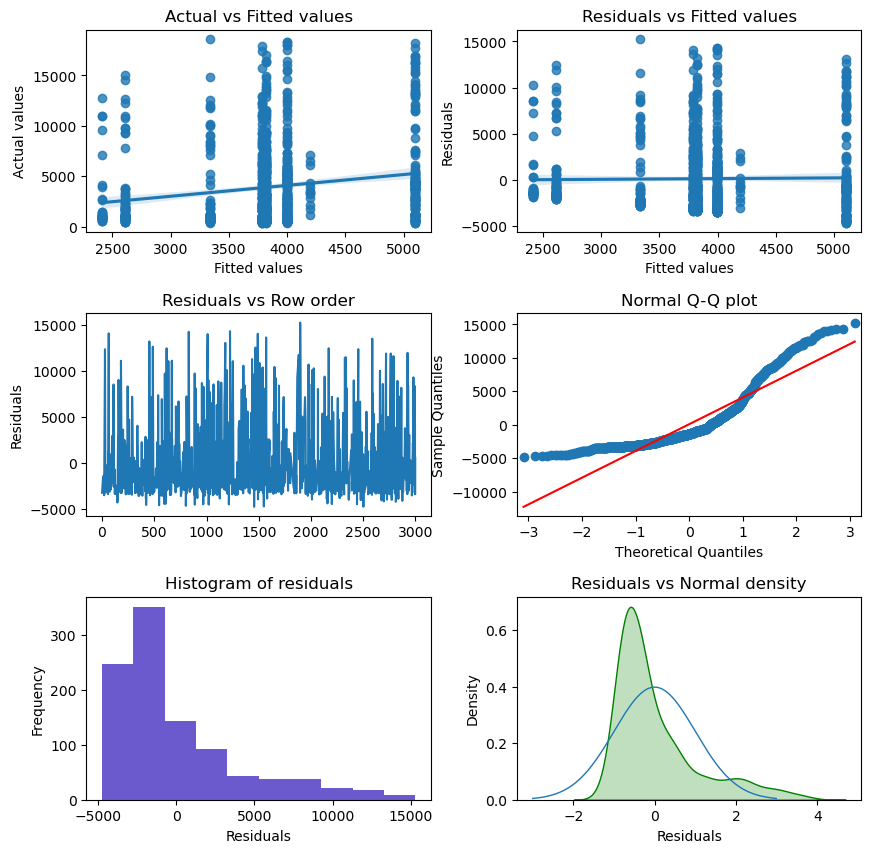

In [12]:
reg.plot("dashboard")

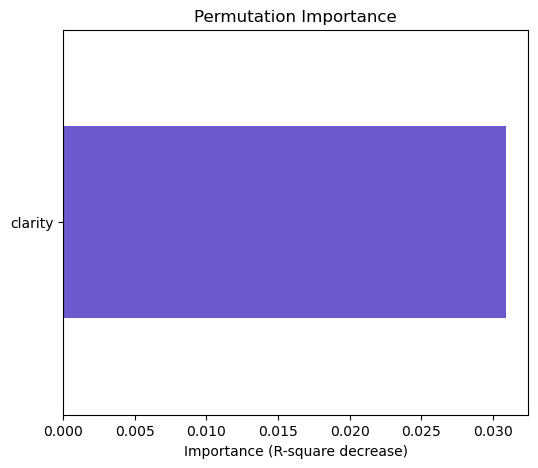

In [13]:
reg.plot("vimp")

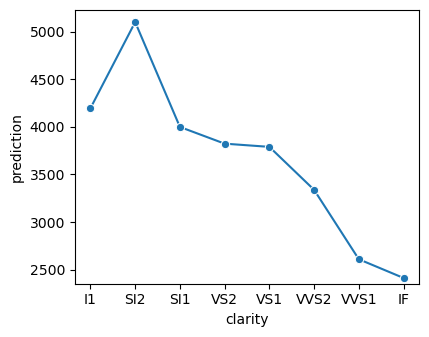

In [14]:
reg.plot("pred")

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:803: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [pos - 0.5, pos + 0.5], [means[pos], means[pos]], color="blue"


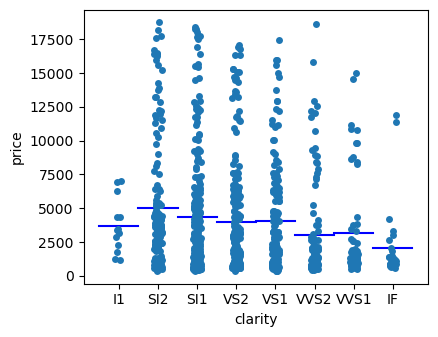

In [15]:
reg.plot("scatter")

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:803: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [pos - 0.5, pos + 0.5], [means[pos], means[pos]], color="blue"


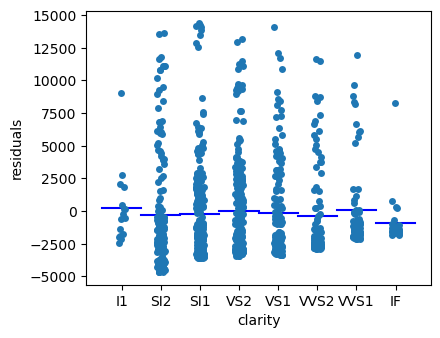

In [16]:
reg.plot("residual")

In [17]:
reg = rsm.model.regress(
    data={"diamonds": diamonds},
    rvar="price",
    evar=["clarity", "carat"]
)
reg.summary()

Linear regression (OLS)
Data                 : diamonds
Response variable    : price
Explanatory variables: clarity, carat
Null hyp.: the effect of x on price is zero
Alt. hyp.: the effect of x on price is not zero

               coefficient  std.error  t.value p.value     
Intercept        -6780.993    204.952  -33.086  < .001  ***
clarity[SI2]      2790.760    201.395   13.857  < .001  ***
clarity[SI1]      3608.531    200.508   17.997  < .001  ***
clarity[VS2]      4249.906    201.607   21.080  < .001  ***
clarity[VS1]      4461.956    204.592   21.809  < .001  ***
clarity[VVS2]     5109.476    210.207   24.307  < .001  ***
clarity[VVS1]     5027.669    214.251   23.466  < .001  ***
clarity[IF]       5265.170    233.658   22.534  < .001  ***
carat             8438.030     51.101  165.125  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.904, Adjusted R-squared: 0.904
F-statistic: 3530.024 df(8, 2991), p.value < 0.001
Nr obs: 3,000


In [18]:
reg.coef.round(3)

,index,coefficient,std.error,t.value,p.value,
0,Intercept,-6780.993,204.952,-33.086,0.0,***
1,clarity[T.SI2],2790.760,201.395,13.857,0.0,***
2,clarity[T.SI1],3608.531,200.508,17.997,0.0,***
3,clarity[T.VS2],4249.906,201.607,21.080,0.0,***
4,clarity[T.VS1],4461.956,204.592,21.809,0.0,***
5,clarity[T.VVS2],5109.476,210.207,24.307,0.0,***
6,clarity[T.VVS1],5027.669,214.251,23.466,0.0,***
7,clarity[T.IF],5265.170,233.658,22.534,0.0,***
8,carat,8438.030,51.101,165.125,0.0,***


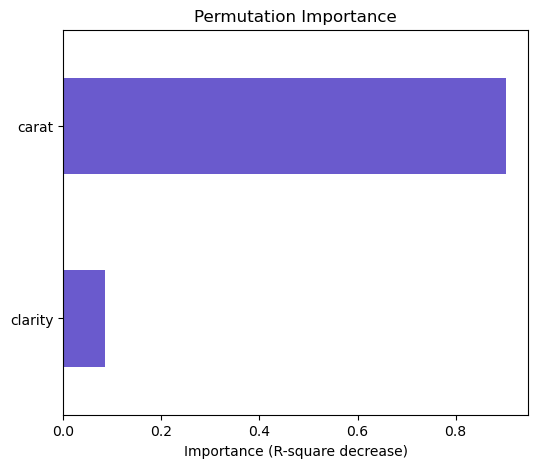

In [19]:
reg.plot("vimp")

In [20]:
# test of clarity as a whole is statistically significant
reg.summary(main=False, fit=False, test="clarity")



Model 1: price ~ carat
Model 2: price ~ clarity + carat
R-squared, Model 1 vs 2: 0.860 vs 0.904
F-statistic: 197.585 df (7, 2991), p.value < .001


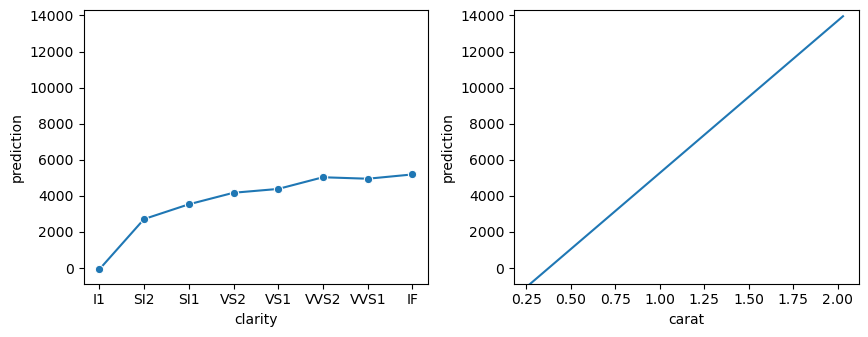

In [21]:
reg.plot("pred")

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/model.py:803: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [pos - 0.5, pos + 0.5], [means[pos], means[pos]], color="blue"


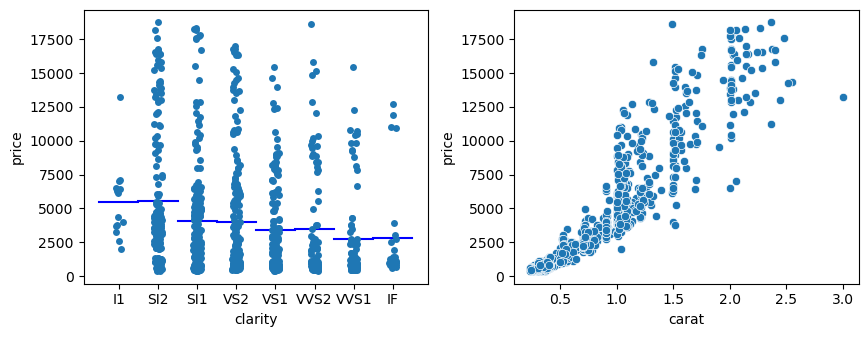

In [22]:
reg.plot("scatter")

In [23]:
# correlations between carat and clarity
pd.get_dummies(diamonds[["carat", "clarity"]]).corr().carat.round(3)

carat           1.000
clarity_I1      0.124
clarity_SI2     0.276
clarity_SI1     0.066
clarity_VS2    -0.046
clarity_VS1    -0.062
clarity_VVS2   -0.137
clarity_VVS1   -0.166
clarity_IF     -0.128
Name: carat, dtype: float64

Correlation
Data     : Not provided
Method   : pearson
Cutoff   : 0
Variables: price, carat, clarity_I1, clarity_SI2, clarity_SI1, clarity_VS2, clarity_VS1, clarity_VVS2, clarity_VVS1, clarity_IF
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
              price  carat clarity_I1 clarity_SI2 clarity_SI1 clarity_VS2  \
carat          0.93                                                         
clarity_I1     0.01   0.12                                                  
clarity_SI2    0.14   0.28      -0.05                                       
clarity_SI1    0.01   0.07      -0.07       -0.26                           
clarity_VS2   -0.01  -0.05      -0.06       -0.25        -0.3               
clarity_VS1   -0.01  -0.06      -0.05       -0.19       -0.23       -0.22   
clarity_VVS2  -0.05  -0.14      -0.04       -0.15       -0.18       -0.17   
clarity_VVS1  -0.09  -0.17      -0.03       -0.13       -0.16       -0.15  

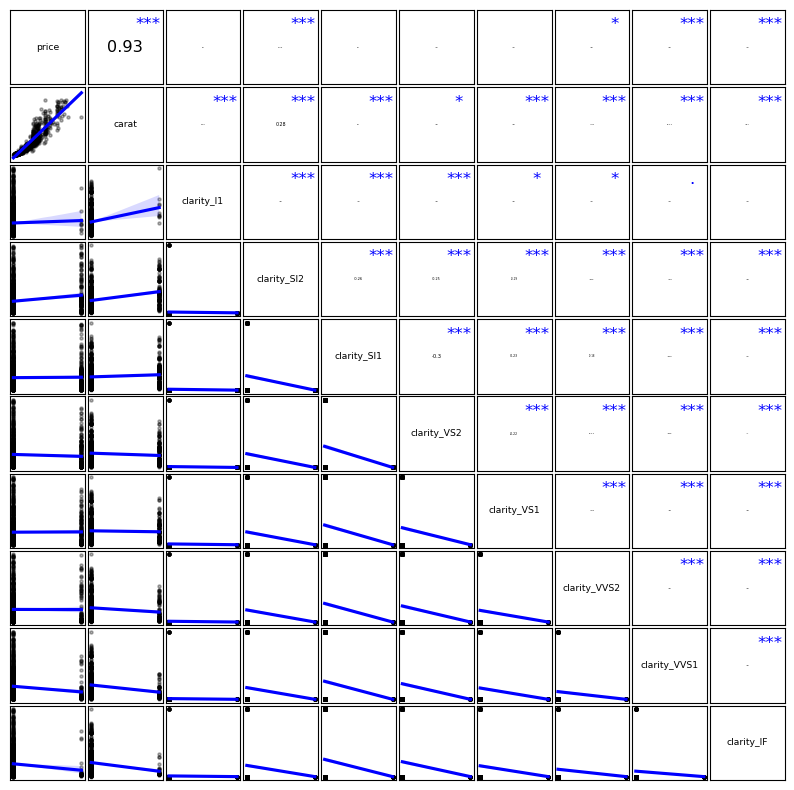

In [24]:
## pyrsm doesn't (currently) support calculation of correlations with categorical variables
c = rsm.correlation(pd.get_dummies(diamonds[["price", "carat", "clarity"]]))
c.summary()
c.plot()

In [25]:
# run linear regression on click data
reg = rsm.model.regress(
    data={"click": click},
    rvar="sales",
    evar="advertising"
)
reg.summary()

Linear regression (OLS)
Data                 : click
Response variable    : sales
Explanatory variables: advertising
Null hyp.: the effect of x on sales is zero
Alt. hyp.: the effect of x on sales is not zero

             coefficient  std.error  t.value p.value     
Intercept        270.867     51.813    5.228  < .001  ***
advertising       50.615      4.428   11.430  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.775, Adjusted R-squared: 0.769
F-statistic: 130.644 df(1, 38), p.value < 0.001
Nr obs: 40


In [26]:
# run linear regression on click data
reg = rsm.model.regress(
    data={"click": click},
    rvar="sales",
    evar="salesreps"
)
reg.summary()

Linear regression (OLS)
Data                 : click
Response variable    : sales
Explanatory variables: salesreps
Null hyp.: the effect of x on sales is zero
Alt. hyp.: the effect of x on sales is not zero

           coefficient  std.error  t.value p.value     
Intercept      160.132     60.452    2.649   0.012    *
salesreps      132.489     11.496   11.524  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.778, Adjusted R-squared: 0.772
F-statistic: 132.811 df(1, 38), p.value < 0.001
Nr obs: 40


In [27]:
# run linear regression on click data
reg = rsm.model.regress(
    data={"click": click},
    rvar="sales",
    evar=["advertising", "salesreps"]
)
reg.summary()

Linear regression (OLS)
Data                 : click
Response variable    : sales
Explanatory variables: advertising, salesreps
Null hyp.: the effect of x on sales is zero
Alt. hyp.: the effect of x on sales is not zero

             coefficient  std.error  t.value p.value     
Intercept        138.657     46.311    2.994   0.005   **
advertising       28.312      5.327    5.315  < .001  ***
salesreps         75.063     13.919    5.393  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.874, Adjusted R-squared: 0.867
F-statistic: 128.141 df(2, 37), p.value < 0.001
Nr obs: 40


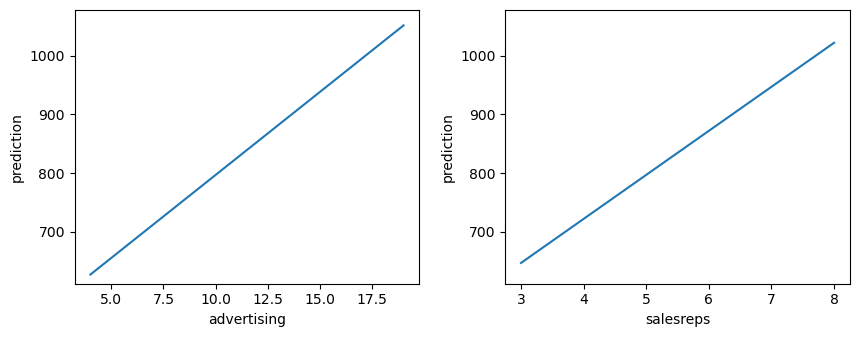

In [28]:
reg.plot("pred")

In the current version of `pyrsm`, `vif` requires a model that has not yet been fitted

In [29]:
reg.summary(main=False, fit=False, vif=True)


Variance inflation factors:

               vif    Rsq
salesreps    2.517  0.603
advertising  2.517  0.603


Correlation
Data     : Not provided
Method   : pearson
Cutoff   : 0
Variables: sales, advertising, salesreps
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
            sales advertising
advertising  0.88            
salesreps    0.88        0.78

p.values:
            sales advertising
advertising   0.0            
salesreps     0.0         0.0


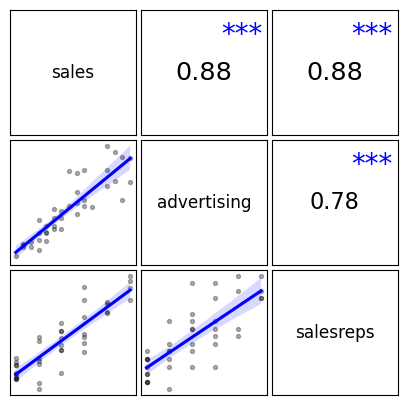

In [30]:
cr = rsm.correlation(click)
cr.summary()
cr.plot()

In [31]:
click.drop(columns="wholesaler_eff").corr().round(3)

,sales,advertising,salesreps
sales,1.000,0.880,0.882
advertising,0.880,1.000,0.776
salesreps,0.882,0.776,1.000
